<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Pandas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Tutorial 11. Reshape dataframe using melt

### Melt is used to transform or reshape data

Melt transforms data from wide format (many columns) to long format (fewer columns, more rows). It "unpivots" your DataFrame.

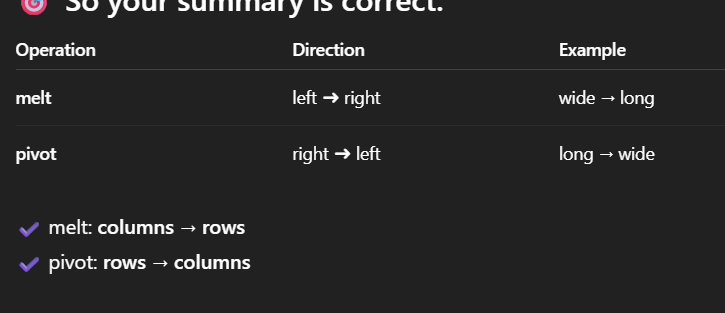

🔄 MELT = Wide → Long

👉 You go from many columns → fewer columns but many more rows.





```
# 🔁 PIVOT = Long → Wide

(Right table → Left table)
You go from long → wide.
```




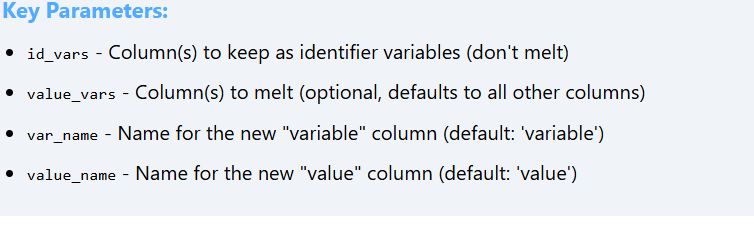

In [2]:
import pandas as pd
df = pd.read_csv("/content/weather (1).csv")
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


 id_vars  # columns to keep as is

In [3]:
df1=pd.melt(df,id_vars=['day'])
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [9]:
df1=df.melt(id_vars=['day'])
df1[df1['variable']=='chicago'] #we only want chicago value

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25


###

In [10]:
df2=pd.melt(df,id_vars=['day'],var_name='city',value_name='temperature')
df2

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75




---



---



---

# Exercise

Melt a simple sales DataFrame. Keep 'Product' as the identifier and convert Q1-Q4 columns into 'Quarter' and 'Sales'.

In [2]:
import pandas as pd

df = pd.DataFrame({
    'Product': ['A', 'B', 'C'],
    'Q1': [100, 150, 200],
    'Q2': [110, 160, 210],
    'Q3': [120, 170, 220],
    'Q4': [130, 180, 230]
})


In [3]:
new_df=pd.melt(df,id_vars='Product',var_name='Quarter',value_name='Sales')
new_df

,Product,Quarter,Sales
0,A,Q1,100
1,B,Q1,150
2,C,Q1,200
3,A,Q2,110
4,B,Q2,160
5,C,Q2,210
6,A,Q3,120
7,B,Q3,170
8,C,Q3,220
9,A,Q4,130


Melt student test scores. Keep both 'Student' and 'Class' as identifiers.

In [4]:
import pandas as pd

df = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Charlie'],
    'Class': ['A', 'B', 'A'],
    'Math': [85, 90, 78],
    'Science': [88, 85, 92],
    'English': [90, 88, 85]
})

In [7]:
df_3=pd.melt(df,id_vars=['Student','Class'],var_name='Subject',value_name='Score')
df_3

,Student,Class,Subject,Score
0,Alice,A,Math,85
1,Bob,B,Math,90
2,Charlie,A,Math,78
3,Alice,A,Science,88
4,Bob,B,Science,85
5,Charlie,A,Science,92
6,Alice,A,English,90
7,Bob,B,English,88
8,Charlie,A,English,85


Melt only specific columns. Keep 'Employee' as identifier but only melt 'Jan' and 'Feb' (not 'Mar').

In [8]:
import pandas as pd

df = pd.DataFrame({
    'Employee': ['John', 'Jane', 'Jim'],
    'Jan': [5000, 5500, 4800],
    'Feb': [5200, 5600, 4900],
    'Mar': [5300, 5700, 5000]
})

In [11]:
new_df=pd.melt(df,id_vars='Employee',value_vars=['Jan','Feb'],var_name='Month',value_name='Salary')
new_df

,Employee,Month,Salary
0,John,Jan,5000
1,Jane,Jan,5500
2,Jim,Jan,4800
3,John,Feb,5200
4,Jane,Feb,5600
5,Jim,Feb,4900


Melt temperature data with default column names (no var_name or value_name specified).

In [12]:
df = pd.DataFrame({
    'City': ['NYC', 'LA', 'Chicago'],
    'Morning': [32, 55, 28],
    'Afternoon': [45, 68, 35],
    'Evening': [38, 60, 30]
})
new_df=pd.melt(df,id_vars='City')

In [13]:
new_df

,City,variable,value
0,NYC,Morning,32
1,LA,Morning,55
2,Chicago,Morning,28
3,NYC,Afternoon,45
4,LA,Afternoon,68
5,Chicago,Afternoon,35
6,NYC,Evening,38
7,LA,Evening,60
8,Chicago,Evening,30


Melt a DataFrame with NO id_vars (all columns should be melted).

In [16]:
import pandas as pd

df = pd.DataFrame({
    'Apple': [10, 12, 15],
    'Banana': [20, 22, 25],
    'Orange': [30, 32, 35]
})
new_df=pd.melt(df,var_name='Fruit',value_name='Price')
new_df

,Fruit,Price
0,Apple,10
1,Apple,12
2,Apple,15
3,Banana,20
4,Banana,22
5,Banana,25
6,Orange,30
7,Orange,32
8,Orange,35


Melt a real-world dataset: website traffic data with multiple metrics. Keep 'Date' and 'Page' as identifiers, melt 'Views', 'Clicks', and 'Conversions'.

In [18]:
import pandas as pd

df = pd.DataFrame({
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02'],
    'Page': ['Home', 'About', 'Home'],
    'Views': [1000, 500, 1200],
    'Clicks': [100, 50, 120],
    'Conversions': [10, 5, 12]
})
new_df=pd.melt(df,id_vars=['Date','Page'],var_name='Metric',value_name='Count')
new_df

,Date,Page,Metric,Count
0,2024-01-01,Home,Views,1000
1,2024-01-01,About,Views,500
2,2024-01-02,Home,Views,1200
3,2024-01-01,Home,Clicks,100
4,2024-01-01,About,Clicks,50
5,2024-01-02,Home,Clicks,120
6,2024-01-01,Home,Conversions,10
7,2024-01-01,About,Conversions,5
8,2024-01-02,Home,Conversions,12


Melt survey data where respondents rated multiple items. Then calculate the average rating per item.

In [21]:
import pandas as pd

df = pd.DataFrame({
    'Respondent': ['R1', 'R2', 'R3'],
    'Quality': [5, 4, 5],
    'Price': [3, 4, 3],
    'Service': [4, 5, 4],
    'Location': [5, 5, 4]
})
new_df=pd.melt(df,id_vars='Respondent')
new_df


,Respondent,variable,value
0,R1,Quality,5
1,R2,Quality,4
2,R3,Quality,5
3,R1,Price,3
4,R2,Price,4
5,R3,Price,3
6,R1,Service,4
7,R2,Service,5
8,R3,Service,4
9,R1,Location,5


In [23]:
new_df.groupby('variable')['value'].mean()

,value
variable,
Location,4.666667
Price,3.333333
Quality,4.666667
Service,4.333333
